In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram,linkage
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
dataset=pd.read_csv("../input/heart.csv")

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


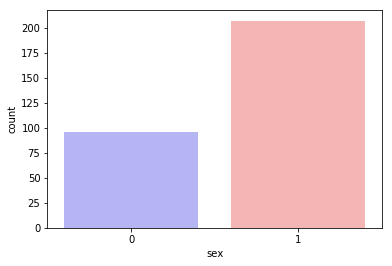

In [4]:
sns.countplot(x=dataset.sex,palette="bwr")
plt.show()

In [5]:
dataset.sex.value_counts().index.values

array([1, 0])

In [6]:
# AND
print("Female count {} and %{}".format(len(dataset[dataset.sex==0]),(len(dataset[dataset.sex==0]*100)/len(dataset.sex)*100)))
# AND
print("Male count {} and %{}".format(len(dataset[dataset.sex==1]),(len(dataset[dataset.sex==1]*100)/len(dataset.sex)*100)))

Female count 96 and %31.683168316831683
Male count 207 and %68.31683168316832


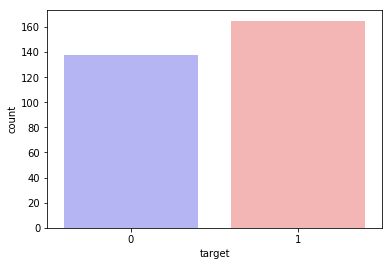

In [7]:
sns.countplot(x=dataset.target, palette="bwr")
plt.show()

In [8]:
# AND
print("Havent Heart Disease count {} and %{}".format(len(dataset[dataset.target==0]),(len(dataset[dataset.target==0]*100)/len(dataset.target)*100)))
# AND
print("Have Heart Disease count {} and %{}".format(len(dataset[dataset.target==1]),(len(dataset[dataset.target==1]*100)/len(dataset.target)*100)))

Havent Heart Disease count 138 and %45.54455445544555
Have Heart Disease count 165 and %54.45544554455446


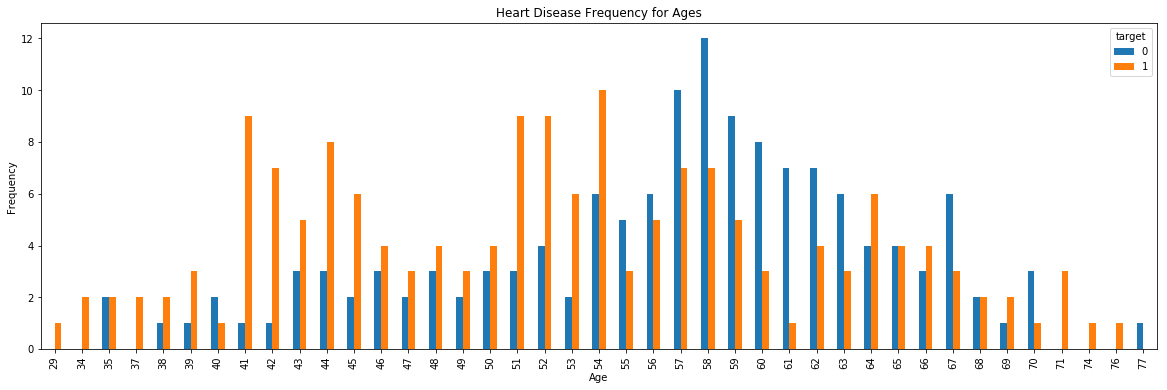

In [9]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

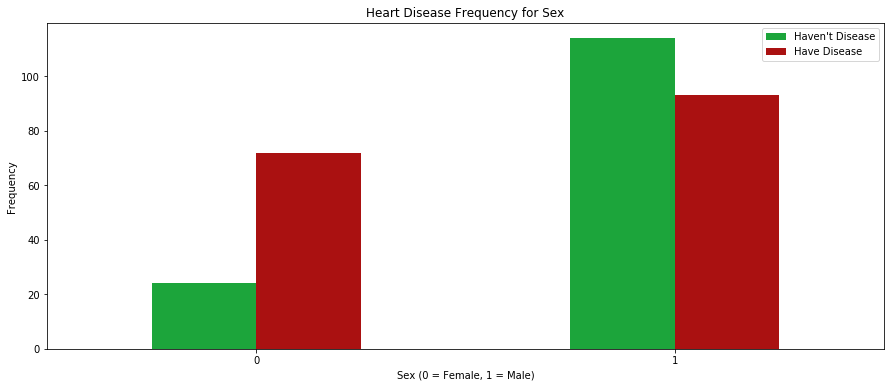

In [10]:
pd.crosstab(dataset.sex,dataset.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [11]:
#dataset.drop(["age"],axis=1,inplace=True)

In [12]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


****LOGISTIC REGRESSION****

In [13]:
x_data=dataset.drop(["target"],axis=1)
y=dataset.target.values

In [14]:
#Normalize
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.shape,x_test.shape # All 303 Rows

((242, 13), (61, 13))

In [17]:
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T
x_train.shape,x_test.shape ,y_train.shape , y_test.shape

((13, 242), (13, 61), (242,), (61,))

In [18]:
def initialize_weight_bias(x_train):
    weight=np.full((x_train.shape[0],1),0.1)
    bias=0.0
    return weight,bias

In [19]:
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

In [20]:
def forward_backward_propagation(x_train,y_train,weight,bias):
    y_head= sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    #backward propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients 

In [21]:
def update(x_train,y_train,weight,bias,learningRate,iteration):
    costlist=[]
    cost2list2=[]
    index=[]
    for i in range(iteration):
        cost,gradients = forward_backward_propagation(x_train,y_train,weight,bias)
        costlist.append(cost)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        if i%10==0:
            cost2list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost))
    parameters = {"weight": weight,"bias": bias}
    plt.plot(index,cost2list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters,gradients,costlist

In [22]:
def predict(x_test,weight,bias):
    z=sigmoid(np.dot(weight.T,x_test)+bias)
    Y_prediction=np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if(z[0,i]<=0.5):
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
    return Y_prediction

In [23]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    weight,bias=initialize_weight_bias(x_train)
    parameters,gradients,cost_list=update(x_train,y_train,weight,bias,learning_rate,num_iterations)
    y_prediction_test=predict(x_test,parameters["weight"],parameters["bias"])
    #
    print("test accuracy : {} ".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))

Cost after iteration 0: 0.718824
Cost after iteration 10: 0.525760
Cost after iteration 20: 0.466610
Cost after iteration 30: 0.437944
Cost after iteration 40: 0.420743
Cost after iteration 50: 0.409081
Cost after iteration 60: 0.400567
Cost after iteration 70: 0.394044
Cost after iteration 80: 0.388875
Cost after iteration 90: 0.384674
Cost after iteration 100: 0.381192
Cost after iteration 110: 0.378259
Cost after iteration 120: 0.375757
Cost after iteration 130: 0.373596
Cost after iteration 140: 0.371712


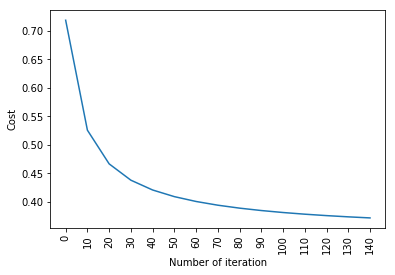

test accuracy : 85.24590163934427 


In [24]:
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=1,num_iterations=150)

In [25]:
lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Accuracy : ",lr.score(x_test.T,y_test.T))
# YEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEY -.- ^.^

Accuracy :  0.8524590163934426


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


****KNN****

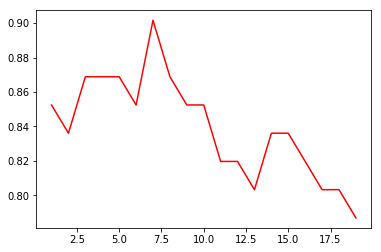

In [26]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
score=[]
for each in range(1,20):
    knn01=KNeighborsClassifier(n_neighbors=each)
    knn01.fit(x_train2,y_train2)
    score.append(knn01.score(x_test2,y_test2))
plt.plot(range(1,20),score,color="red")
plt.show()

In [27]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train2,y_train2)
print("Accuracy :%{}".format((knn.score(x_test2,y_test2))*100))

Accuracy :%90.1639344262295


**SUPPORT VECTOR MACHINE**

In [28]:
# Support Vector Machine
from sklearn.svm import SVC

svm=SVC(random_state=1)
svm.fit(x_train2,y_train2)

# %% print

print("accuracy of svm algo:" ,svm.score(x_test2,y_test2))

accuracy of svm algo: 0.819672131147541


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


***GAUSSIAN***

In [29]:

from sklearn.naive_bayes import GaussianNB

naive=GaussianNB();
naive.fit(x_train2,y_train2)

# %% print
print("accuracy of naivebayes algo:" ,naive.score(x_test2,y_test2))

accuracy of naivebayes algo: 0.8524590163934426


****Deep Learning - ANN - With Keras Libraries****

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
# %%
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
# %%
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train2.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train2, y = y_train2, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Using TensorFlow backend.


Epoch 1/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6932 - acc: 0.4348
Epoch 2/100
161/161 [==============================] - 0s 65us/step - loss: 0.6931 - acc: 0.5590
Epoch 3/100
161/161 [==============================] - 0s 51us/step - loss: 0.6931 - acc: 0.5590
Epoch 4/100
161/161 [==============================] - 0s 50us/step - loss: 0.6929 - acc: 0.5590
Epoch 5/100
161/161 [==============================] - 0s 56us/step - loss: 0.6928 - acc: 0.5590
Epoch 6/100
161/161 [==============================] - 0s 53us/step - loss: 0.6928 - acc: 0.5590
Epoch 7/100
161/161 [==============================] - 0s 55us/step - loss: 0.6928 - acc: 0.5590
Epoch 8/100
161/161 [==============================] - 0s 54us/step - loss: 0.6927 - acc: 0.5590
Epoch 9/100
161/161 [==============================] - 0s 56us/step - loss: 0.6926 - acc: 0.5590
Epoch 10/100
161/161 [==============================] - 0s 53us/step - loss: 0.6925 - acc: 0.5590
Epoch 11/100
161/161 [========

****K-Means Clustering****

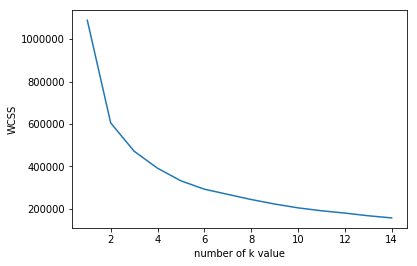

In [31]:
from sklearn.cluster import KMeans
wcss=[]
datasetkmeans=dataset.drop(["target"],axis=1)
for each in range(1,15):
    kmeans=KMeans(n_clusters=each)
    kmeans.fit(datasetkmeans)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k value")
plt.ylabel("WCSS")
plt.show()
# %% for K=2  


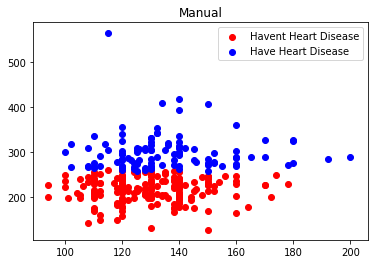

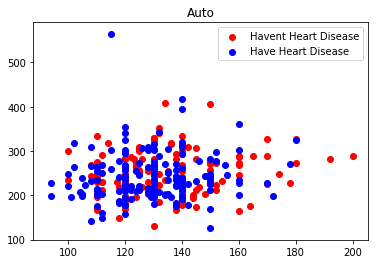

In [32]:
kmeans2=KMeans(n_clusters=2)
clusters=kmeans2.fit_predict(datasetkmeans)
datasetkmeans["label"]=clusters
plt.scatter(datasetkmeans.trestbps[datasetkmeans.label==0],datasetkmeans.chol[datasetkmeans.label==0],color="red",label="Havent Heart Disease")
plt.scatter(datasetkmeans.trestbps[datasetkmeans.label==1],datasetkmeans.chol[datasetkmeans.label==1],color="blue",label="Have Heart Disease")
plt.title("Manual")
plt.legend()
plt.show()

plt.scatter(dataset.trestbps[dataset.target==0],dataset.chol[dataset.target==0],color="red",label="Havent Heart Disease")
plt.scatter(dataset.trestbps[dataset.target==1],dataset.chol[dataset.target==1],color="blue",label="Have Heart Disease")
plt.title("Auto")
plt.legend()
plt.show()

****Hierarcical Clustering****

In [33]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


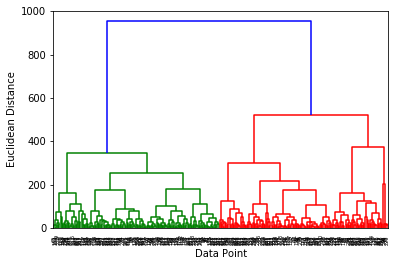

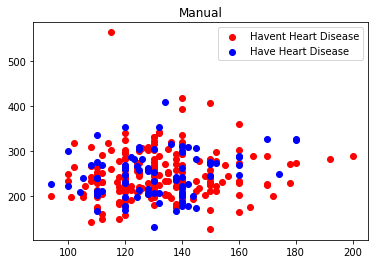

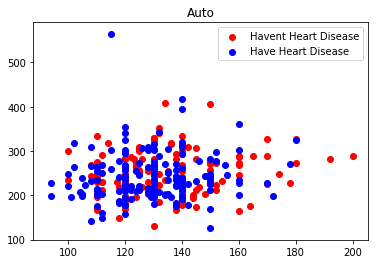

(97, 303, 303)

In [34]:
from scipy.cluster.hierarchy import dendrogram,linkage
datasetexcept=dataset.drop(["target"],axis=1)
merg=linkage(dataset,method="ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Data Point")
plt.ylabel("Euclidean Distance")
plt.show()
# %% HCC
from sklearn.cluster import AgglomerativeClustering

hierarcical=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")

clusters=hierarcical.fit_predict(x)

dataset["label"]=clusters

plt.scatter(dataset.trestbps[dataset.label==0],dataset.chol[dataset.label==0],color="red",label="Havent Heart Disease")
plt.scatter(dataset.trestbps[dataset.label==1],dataset.chol[dataset.label==1],color="blue",label="Have Heart Disease")
plt.title("Manual")
plt.legend()
plt.show()

plt.scatter(dataset.trestbps[dataset.target==0],dataset.chol[dataset.target==0],color="red",label="Havent Heart Disease")
plt.scatter(dataset.trestbps[dataset.target==1],dataset.chol[dataset.target==1],color="blue",label="Have Heart Disease")
plt.title("Auto")
plt.legend()
plt.show()
fitaa=list(hierarcical.fit_predict(X=dataset.label.values.reshape(-1,1),y=dataset.target.values.reshape(-1,1)))
fitbb=dataset.target
dictionaryab={"predict":fitaa,"real":fitbb}
datasetab=pd.DataFrame(dictionaryab)
len(datasetab[datasetab.predict==datasetab.real]),len(datasetab.predict),len(datasetab.real)
# TOO BAD like %33

****K-Fold Cross Validation****

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8) # n_neighbors K değeridir.

# %% K Fold CV K=10

from sklearn.model_selection import cross_val_score

accuracies=cross_val_score(estimator=knn,X=x_train2,y=y_train2,cv=10)
print("Average accuracy :",np.mean(accuracies))
print("Average Std :",np.std(accuracies))

# %% TEST
knn.fit(x_train2,y_train2)
print("Test accuracy {}".format(knn.score(x_test2,y_test2)))

# %% Grid Search K-Fold CV

from sklearn.model_selection import GridSearchCV

grid={"n_neighbors":np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=10)
knn_cv.fit(x,y)

# %% print hyperparamet KNN algorithm K Değeri

print("tuned hyperparameter K:",knn_cv.best_params_)

print("tuned parametreye göre en iyi accuracy(best_score)  :",knn_cv.best_score_)


Average accuracy : 0.7900641025641025
Average Std : 0.06675982765920031
Test accuracy 0.8688524590163934
tuned hyperparameter K: {'n_neighbors': 8}
tuned parametreye göre en iyi accuracy(best_score)  : 0.8250825082508251


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
# GROUP BY "target"
dataset.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
target,,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.449275
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,0.127273


In [37]:
# VALUE COUNTS
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

****Decision Tree****

In [38]:
#DECİSİON TREE
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train2,y_train2)
print("Score : ",dt.score(x_test2,y_test2))

Score :  0.7540983606557377


****Random Forest****

In [39]:
# %% Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train2,y_train2)
print("random forest algo result : ",rf.score(x_test2,y_test2))

random forest algo result :  0.8524590163934426
